In [7]:
# Photometry using VYSOS data 

import numpy as np
import matplotlib.pyplot as plt 

import photutils
from photutils import aperture_photometry
from photutils import SkyCircularAperture

from astropy import units as u
from astropy.coordinates import SkyCoord

from astropy.io import fits
from astropy.wcs import WCS

# import matplotlib as mpl
# mpl.rcParams['figure.dpi'] = 1200

import glob
import scipy
import scipy.constants
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline


### Kyle Barbaery's SEP 
### astropy.io 
### David's nuphot.py

### CMOS camera J. Walawender friend 
## 60 megapix camera 
## data good 
## want 2 see data from blue side of dichroic 

### 


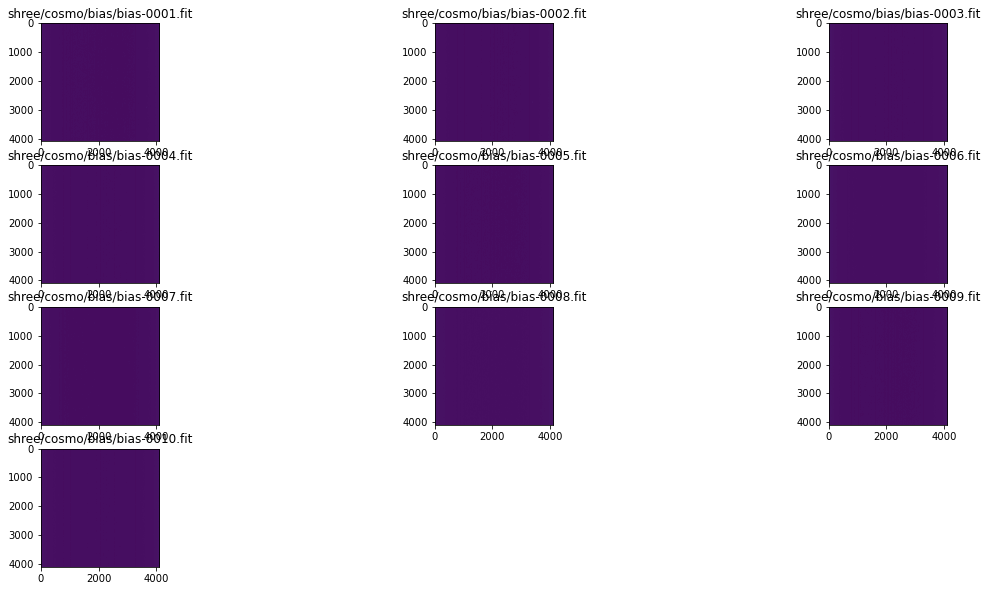

In [8]:
#bias frames
biasfilenames = []
for i in range(1,10):
    biasfilename_i = '/Users/vanshree/cosmo/bias/bias-000'+str(i)+'.fit'
    biasfilenames = np.append(biasfilenames,biasfilename_i)
biasfilenames = np.append(biasfilenames,'/Users/vanshree/cosmo/bias/bias-0010.fit')
# print(biasfilenames)

# allbiasims = []
# for i in range(len(biasfilenames)):
#     hdul = fits.open(biasfilenames[i])
#     print(biasfilenames[i])
# #     hdul.info()
#     biasim_i = fits.getdata(biasfilenames[i])
#     allbiasims = np.append(allbiasims,biasim_i)
# sumbias = np.sum(allbiasims)
# medianbias = np.median(allbiasims)
# plt.imshow(medianbias)

fig = plt.figure(figsize=(20,10))
plt.set_cmap('viridis')

biasarr = []

for n in range(len(biasfilenames)):
    file = str(biasfilenames[n])
    hdu = fits.open(file)
    im1 = hdu[0].data
    hd1 = hdu[0].header
#     print(hd1)
#     im1 = im1/hd1['DIVISOR']
#     obj = hd1['OBJECT']
        
    f1 = fig.add_subplot(4,3,n+1)
    vmedian = np.nanmedian(im1)
    #print('File {0} median = {1:6.3f}'.format(n+1,vmedian))
    f1.imshow(np.arcsinh(im1))
    
    #f1.imshow(im1)#, vmin=0.5*np.abs(vmedian), vmax=1.5*np.abs(vmedian), aspect=2)
#     f1.xaxis.set_visible(False)
#     f1.yaxis.set_visible(False)
    plt.title(biasfilenames[n][10::])

    biasarr.append(im1)

    
#     f1.imshow(np.arcsinh(im1))


Shape of stacked bias-frames =  (10, 4096, 4096)
Shape of the median image generated =  (4096, 4096)
Mean of combined bias frame is 1133.6982711553574 counts 


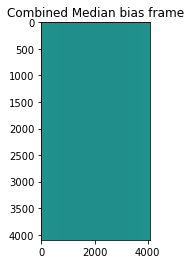

In [9]:
# fig = plt.figure(figsize=(20,20))
plt.set_cmap('viridis')

print("Shape of stacked bias-frames = ",np.shape(biasarr)) #should be 5 x 80 x 512
biasmed = np.median(biasarr, axis=0)
print("Shape of the median image generated = ",np.shape(biasmed))
vmedian = np.nanmedian(biasmed)

plt.title("Combined Median bias frame")
plt.imshow(biasmed,vmin=0.5*np.abs(vmedian), vmax=1.5*np.abs(vmedian), aspect=2)

print("Mean of "+ "combined bias frame" + " is " + str(np.mean(biasmed)) + " counts ")

In [24]:
# loading outputs from astrometry.net.. 

## WCS header
path = '/usr/local/Cellar/astrometry-net/0.82/data/'
wcs = WCS(header = path+'aug08-0003V.wcs')
# print('wcs header',wcs)

## 
hdul = fits.open(path+'aug08-0003V-indx.xyls')
print('table',hdul[1].data)
table = hdul[1].data

# print(hdul)
# #### astrometry 
# # load for all files
# # filename = '/Users/vanshree/cosmo/astrometry/data/aug08-0003V.fit'
# # hdu = fits.open(filename)[0]
# # fig = plt.figure()
# # fig.add_subplot(111, projection=wcs)
# # plt.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
# # plt.xlabel('RA')
# # plt.ylabel('Dec')


table [(3115.01596458, 1699.28018839) (1848.29157585,  837.2667908 )
 (2716.1223636 , 3888.97033265) (2878.95245346,  200.28043629)
 ( 671.7158731 ,  661.3621932 ) ( 645.28358315, 3094.17651813)
 (2548.50872715, 3684.02267482) (2007.22459918, 2536.65715623)
 (3882.1144999 ,  178.47183376) (2838.98429145,  163.54559948)
 (1314.71224433,  295.98568588) (3899.97065062, 1516.0035486 )
 (1516.41417714, 1671.68663154) (1506.65510977, 3507.53930163)
 (3366.4511389 , 3532.22931728) (1928.00572335, 2274.80685733)
 (2640.81270091,  501.5731317 ) (3167.80840971, 2674.85046632)
 (1036.08903124, 3582.61048635) (1448.11591768,  152.07569068)
 ( 164.01626656, 3067.30521433) (2663.91289431, 1192.22494037)
 (2655.65915538, 3664.35038332) ( 367.27504164,  752.51060096)
 (3401.11080305, 3413.49458353) (3911.55988843,  169.92704801)
 (1323.23688485, 3041.25991379) (2659.52025652, 1508.61992968)
 (2781.31041131,  360.09142104) (1850.1723636 , 3901.48143149)
 (3930.48001107, 1595.63291876) (3450.52259964, 3

IndexError: too many indices for array

In [ ]:
### show image 
image_data = fits.getdata('/Users/vanshree/cosmo/astrometry/data/aug08-0003V.fit')
plt.imshow(image_data)#, cmap='gray')
plt.colorbar()